# Ejercicio Formativo 3 Capitulo 2

## Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Primero que todo, cargamos el archivo

In [2]:
df = pd.read_csv("E3_data.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df.isnull().value_counts()

show_id  type   title  director  country  date_added  release_year  rating  duration  listed_in
False    False  False  False     False    False       False         False   False     False        8790
Name: count, dtype: int64

In [4]:
#Verificamos si existen o no valores nulos, en caso de que existan, los eliminaremos con '.dropna()'
df["type"].isnull().sum()

0

# Exploración del data frame

In [5]:
# Analizamos que valores tienen sus estadísticos de sus datos númericos.

df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Datos duplicados

Una forma de limpiar un data set, además de verificar si tiene valores nulos, es verificando si tiene o no datos duplicados. La sintaxis es similar a la de verificar si existen valores nulos. 

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
8788    False
8789    False
Length: 8790, dtype: bool

### Un posible analisis: ¿Como ha evolucionado la cantidad de peliculas estrenadas a lo largo de los años según el data set?

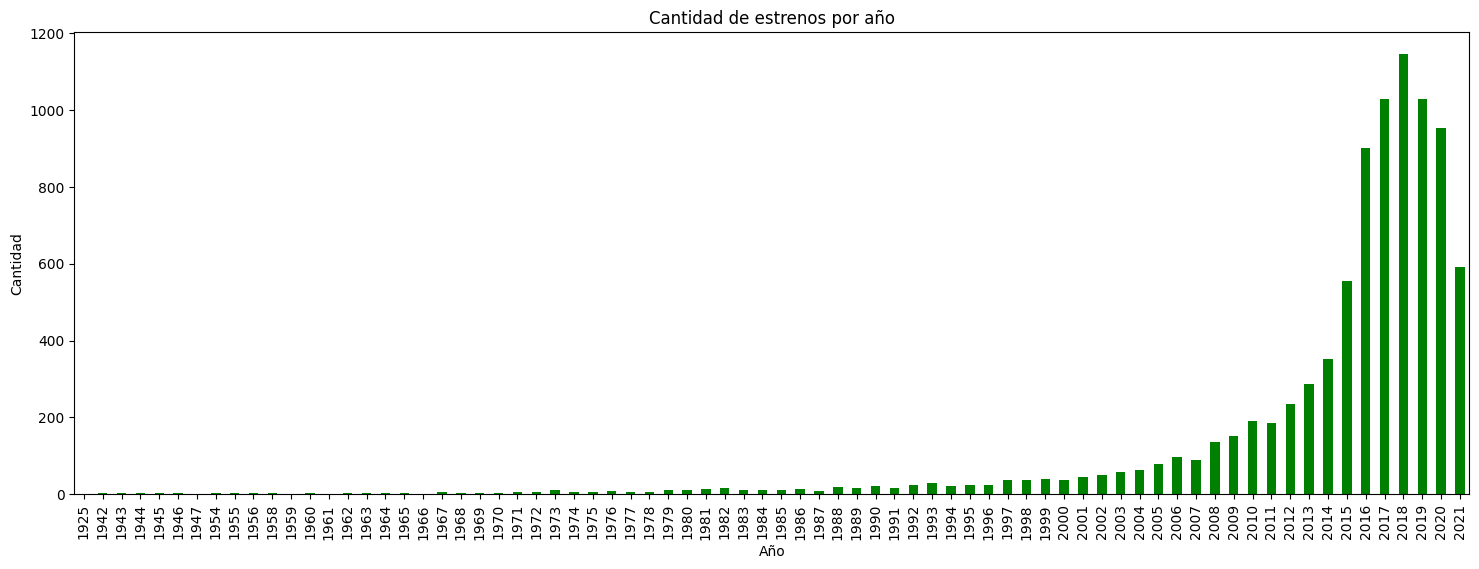

In [7]:
import matplotlib.pyplot as plt
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(18, 6),color=["Green"]) # Notar que Figsize nos entrega el tamaño del ancho y 
                                                                                                 #alto de la gráfica
plt.title('Cantidad de estrenos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

## Consultas

### a) ¿Qué géneros dominan en distintos períodos?

In [8]:
df["listed_in"].value_counts().head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

¿Como lo vemos por año?

In [9]:
df_agrupado_genero_anio = df.groupby(['release_year', 'listed_in']).size().unstack(fill_value=0) #Para agrupar por año y género, con valores nulos igual a cero

In [10]:
df_agrupado_genero_anio.idxmax(axis=1)

release_year
1925                         TV Shows
1942    Classic Movies, Documentaries
1943                    Documentaries
1944    Classic Movies, Documentaries
1945    Classic Movies, Documentaries
                    ...              
2017                    Documentaries
2018                  Stand-Up Comedy
2019                  Stand-Up Comedy
2020     Dramas, International Movies
2021                         Kids' TV
Length: 74, dtype: object

In [11]:
df_agrupado_genero_anio.max(axis=1)

release_year
1925     1
1942     2
1943     2
1944     3
1945     3
        ..
2017    89
2018    58
2019    48
2020    42
2021    24
Length: 74, dtype: int64

In [12]:
# Para cada año, encuentra el género con más estrenos
genero_dominante_por_anio = df_agrupado_genero_anio.idxmax(axis=1) # Aca visualizamos el género dominante, es decir, el de maximo valor repetido por 
                                                                   # cada fila o en este caso, por cada año
cantidad_dominante_por_anio = df_agrupado_genero_anio.max(axis=1) #Aca visualizamos la cantidad de estrenos del género dominante por año

`max` nos entrega el valor maximo de cada fila, o en este caso de cada año, es decir, para este caso sería la cantidad más alta de estrenos de géneros por cada año.

`idxmax` lo que hace es que por cada fila, que en este caso es año, del df **genero_dominante_por_anio** busca el valor de la columna que contiene el valor maximo de repeticiones recientemente explicado, o en este caso, busca el genero, el valor de **listed_in**, que contenga la mayor cantidad de estrenos.

In [13]:
genero_dominante_por_anio

release_year
1925                         TV Shows
1942    Classic Movies, Documentaries
1943                    Documentaries
1944    Classic Movies, Documentaries
1945    Classic Movies, Documentaries
                    ...              
2017                    Documentaries
2018                  Stand-Up Comedy
2019                  Stand-Up Comedy
2020     Dramas, International Movies
2021                         Kids' TV
Length: 74, dtype: object

In [14]:
cantidad_dominante_por_anio

release_year
1925     1
1942     2
1943     2
1944     3
1945     3
        ..
2017    89
2018    58
2019    48
2020    42
2021    24
Length: 74, dtype: int64

In [15]:
# Creamos un Data Frame a nuestra pinta para crear los resultados
dominantes = pd.DataFrame({
    'Año': genero_dominante_por_anio.index,
    'Género dominante': genero_dominante_por_anio.values,
    'Cantidad': cantidad_dominante_por_anio.values
})
print(dominantes)

     Año               Género dominante  Cantidad
0   1925                       TV Shows         1
1   1942  Classic Movies, Documentaries         2
2   1943                  Documentaries         2
3   1944  Classic Movies, Documentaries         3
4   1945  Classic Movies, Documentaries         3
..   ...                            ...       ...
69  2017                  Documentaries        89
70  2018                Stand-Up Comedy        58
71  2019                Stand-Up Comedy        48
72  2020   Dramas, International Movies        42
73  2021                       Kids' TV        24

[74 rows x 3 columns]


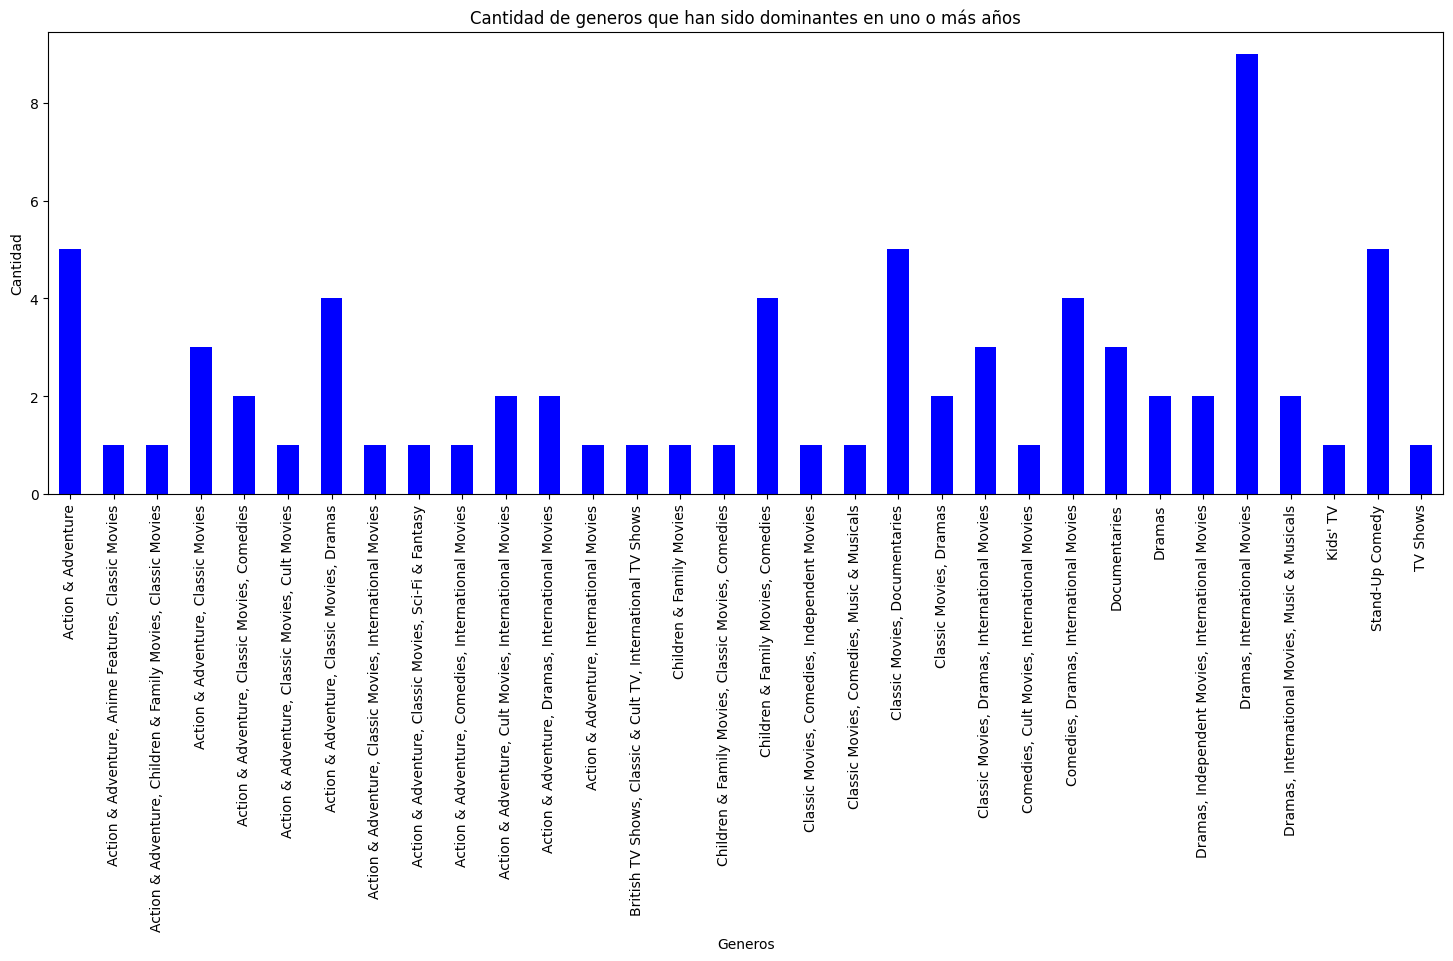

In [16]:
import matplotlib.pyplot as plt
dominantes['Género dominante'].value_counts().sort_index().plot(kind='bar', figsize=(18, 6),color=["Blue"]) # Notar que Figsize nos entrega el tamaño del ancho y 
                                                                                                 #alto de la gráfica
plt.title('Cantidad de generos que han sido dominantes en uno o más años')
plt.xlabel('Generos')
plt.ylabel('Cantidad')
plt.show()

### b) ¿Cómo ha evolucionado la presencia de ciertos tipos de producciones o de clasificaciones por edades?

Para lograr graficar las evolucones de los tipos de peliculas a lo largo de los años, es necesario conocer el metodo unstack().

Este metodo se escribe despues de un groupby que contiene a más de un elemento, y transforma los valores del primer elemento en las filas del data frame, y a los valores del segundo elemento en columnas.

Es necesario que se escriba el metodo `size()`, para que cuente cuantos elementos hay en la combinación de cada uno de los elementos que ponemos dentro de groupby cuando son más de una columna como el siguiente caso, cuya sintaxis por lo demás es: 

In [17]:
df_agrupado = df.groupby(['release_year', 'type']).size().unstack()

df_agrupado

type,Movie,TV Show
release_year,,
1925,NaN,1.0
1942,2.0,NaN
1943,3.0,NaN
1944,3.0,NaN
1945,3.0,1.0
...,...,...
2017,765.0,265.0
2018,767.0,379.0
2019,633.0,397.0


In [18]:
# Solo a simple vista se pudo ver que hay valores nulos. Verificameos nuevamente

df_agrupado.isnull().sum()

type
Movie       1
TV Show    28
dtype: int64

Efectivamente hay valores nulos, los cuales, en vez de eliminarse, deben ser cambiados a 0. Para aquello, usamos la función `fillna()`

In [19]:
df_agrupado = df_agrupado.fillna(0.0)

In [20]:
df_agrupado.isnull().sum()

type
Movie      0
TV Show    0
dtype: int64

Ahora que no hay valores nulos, podemos graficar.

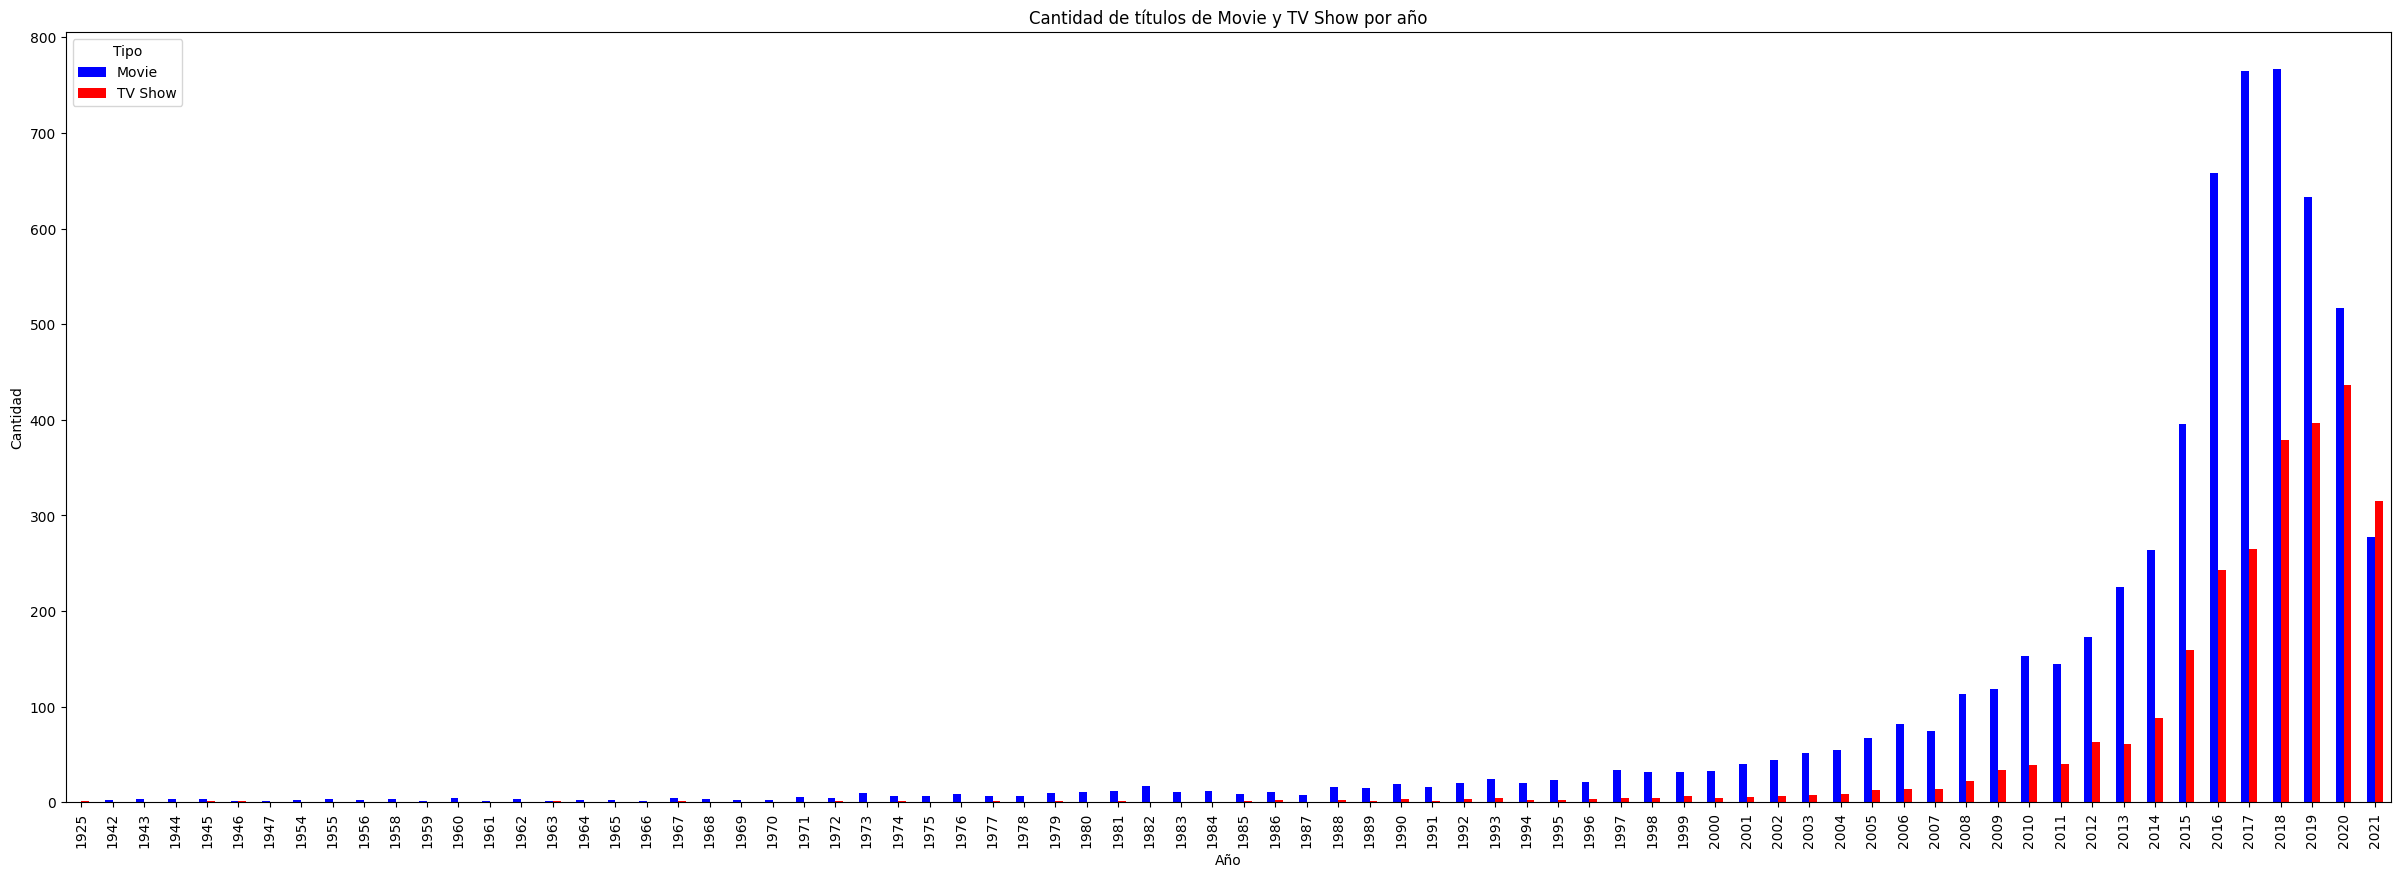

In [21]:
df_agrupado.plot(kind='bar', figsize=(30, 10),color=["Blue","Red"])  # Notar que Figsize nos entrega el tamaño del ancho y alto de la gráfica
plt.title('Cantidad de títulos de Movie y TV Show por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Tipo')
plt.show()

### c) ¿Qué patrones permiten anticipar tendencias?

Lo más directo que tenemos para responder esta pregunta es el grafico de la evolución de lanzamientos por año, realizado anteriormente, ya que, nos dice como ha evolucionado el numero de lanzamiento de titulos y así, nos entrega una entendencia por épocas. 

Otro patrón que nos permiten anticipar tendencias es la evolución de los lanzamientos de Peliculas vs Tv Shows, como nos muestra el ultimo grafico. Si bien, hay muchos mas lanzamientos de peliculas que Tv Shows, a quello se puede deber a que el streaming, como netflix, se comenzó a empoderar tarde, ya que, luego del año 2013, podemos ver que hay crecimientos de lanzamientos de tv shows aumentan. Otro dato interesante es que el 2021, luego de la pandemia, disminuyo el numero de peliculas lanzadas, y también los Tv Shows, sin embargo, es uno de los pocos años, despues de mucho tiempo, en que hay más estrenos de Tv Shows que de peliculas. 

Otra tendencia que podemos apreciar es la cantidad de países que son productoras de peliculas según este data set

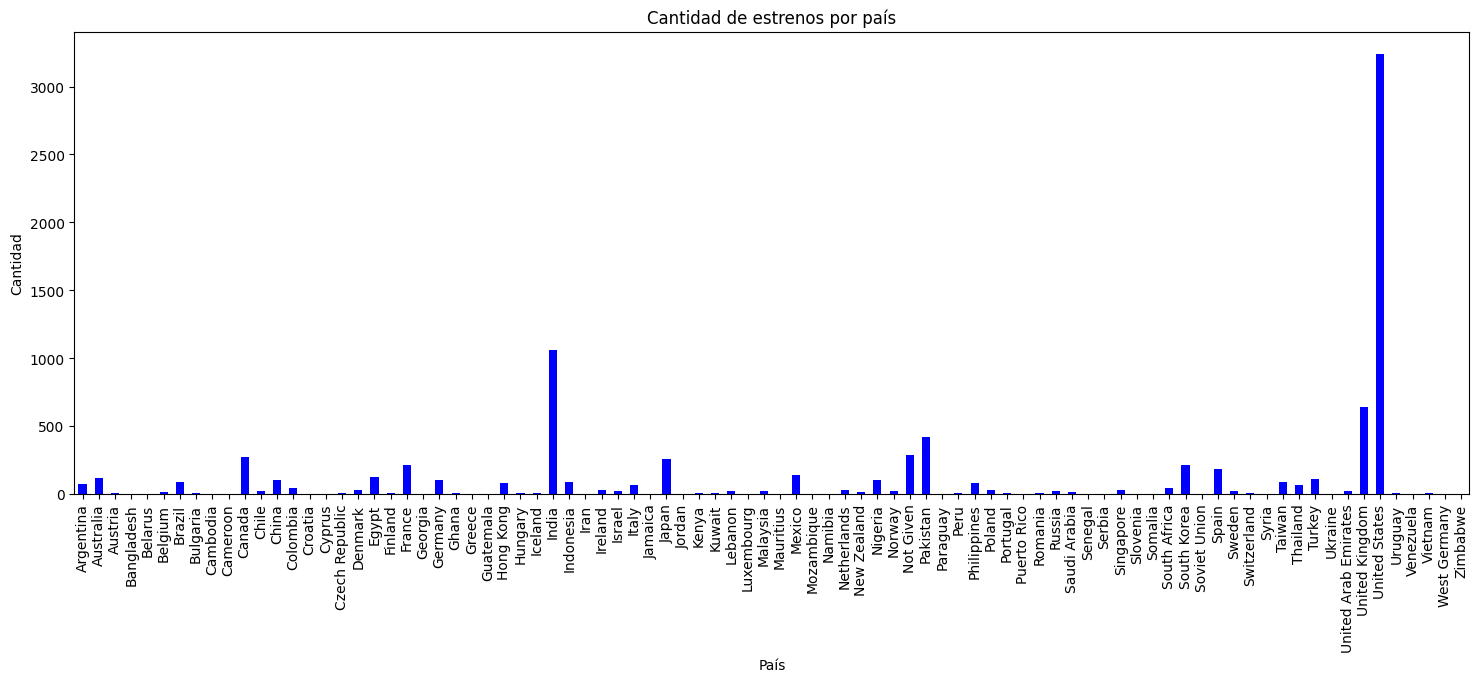

In [22]:
df['country'].value_counts().sort_index().plot(kind='bar', figsize=(18, 6),color=["Blue"]) # Notar que Figsize nos entrega el tamaño del ancho y 
                                                                                           # alto de la gráfica
plt.title('Cantidad de estrenos por país')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.show()

Otra tendencias podrían ser la cantidad de estrenos por cada director.

In [23]:
df["director"].value_counts() 

director
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64

## Visualizandolo por año

In [24]:
df_director_anio = df.groupby(['release_year', 'director']).size().unstack(fill_value=0) #Para agrupar por año y director, con valores nulos igual a cero

df_director_anio

director,A. L. Vijay,A. Raajdheep,A. Salaam,A.R. Murugadoss,Aadish Keluskar,Aamir Bashir,Aamir Khan,Aanand Rai,Aaron Burns,"Aaron Hancox, Michael McNamara",...,Álvaro Brechner,Álvaro Delgado-Aparicio L.,"Álvaro Longoria, Gerardo Olivares",Ángel Gómez Hernández,Ángeles Reiné,Çagan Irmak,Ísold Uggadóttir,Óskar Thór Axelsson,Ömer Faruk Sorak,Şenol Sönmez
release_year,,,,,,,,,,,,,,,,,,,,,
1925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2018,0,0,0,1,1,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
2019,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# Para cada año, encuentra el género con más estrenos
director_dominante_por_anio = df_director_anio.idxmax(axis=1) # Aca visualizamos el género dominante, es decir, el de maximo valor repetido por 
                                                                    # cada fila o en este caso, por cada año
cantidad_dominante_por_anio = df_director_anio.max(axis=1) #Aca visualizamos la cantidad de estrenos del género dominante por año

In [26]:
# Creamos un Data Frame a nuestra pinta para crear los resultados
dominantes = pd.DataFrame({
    'Año': director_dominante_por_anio.index,
    'Director dominante': director_dominante_por_anio.values,
    'Cantidad': cantidad_dominante_por_anio.values
})
print(dominantes)

     Año                                 Director dominante  Cantidad
0   1925                                          Not Given         1
1   1942                                        Frank Capra         1
2   1943                        Frank Capra, Anatole Litvak         1
3   1944  Frank Capra, John Huston, Hugh Stewart, Roy Bo...         1
4   1945                           Frank Capra, Joris Ivens         1
..   ...                                                ...       ...
69  2017                                          Not Given       257
70  2018                                          Not Given       383
71  2019                                          Not Given       395
72  2020                                          Not Given       402
73  2021                                          Not Given       288

[74 rows x 3 columns]


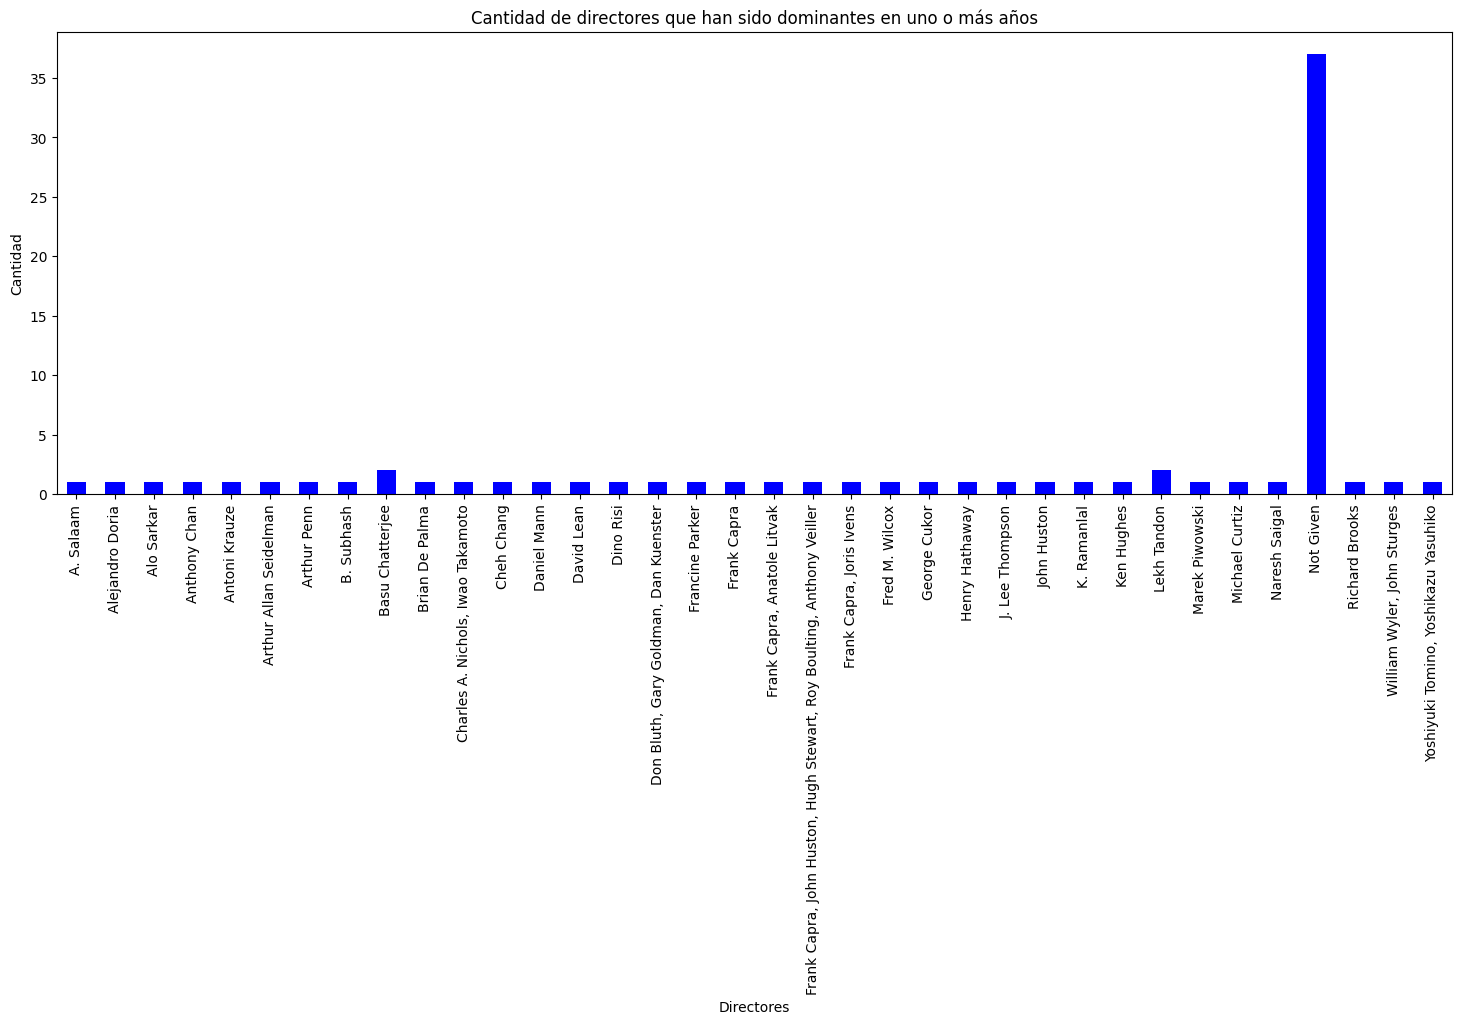

In [27]:
dominantes['Director dominante'].value_counts().sort_index().plot(kind='bar', figsize=(18, 6),color=["Blue"]) # Notar que Figsize nos entrega el tamaño del ancho y 
                                                                                                 #alto de la gráfica
plt.title('Cantidad de directores que han sido dominantes en uno o más años')
plt.xlabel('Directores')
plt.ylabel('Cantidad')
plt.show()